In [1]:
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the image and convert it to grayscale
image = cv2.imread("/Users/rahulr/Documents/PROJECTS/Out_Source/us_images/09-49-17_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = 60

In [3]:
# initialize the list of threshold methods
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV)]

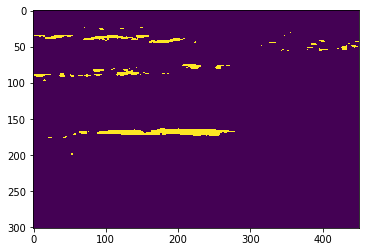

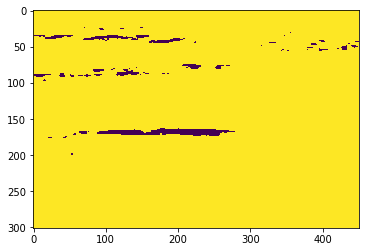

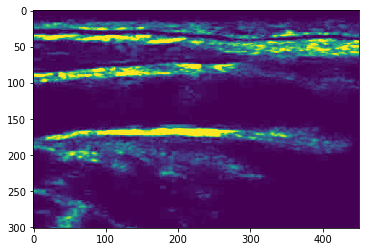

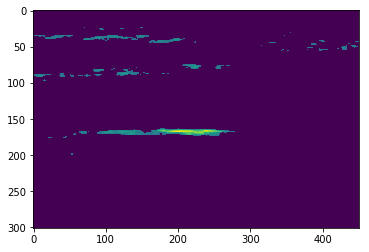

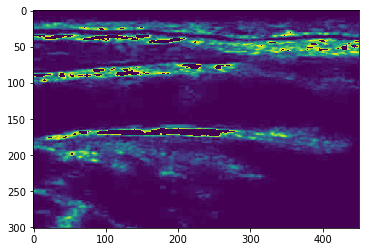

In [4]:
# loop over the threshold methods
for (threshName, threshMethod) in methods:
    # threshold the image and show it
    (T, thresh) = cv2.threshold(gray, threshold, 255, threshMethod)
    imgplot = plt.imshow(thresh)
    plt.show()
    # 	cv2.imshow(threshName, thresh)
    cv2.imwrite("Output-" + threshName + ".jpg", thresh)
    cv2.waitKey(0)

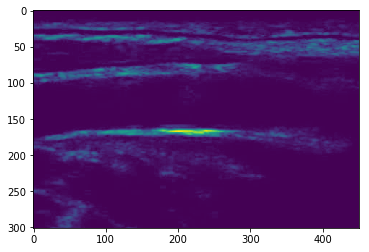

In [5]:
plt.imshow(gray)
plt.show()

In [6]:
# Applying Gaussian blur with kernel size 7 to remove unwanted noise
blurred_image = cv2.GaussianBlur(gray,(7,7),0)

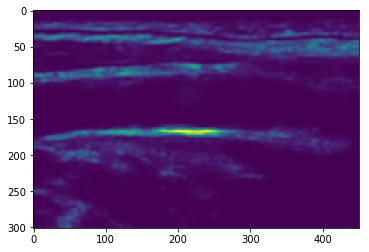

In [7]:
plt.imshow(blurred_image)
plt.show()

In [8]:
# Applying Otsu's thresholding to binarize the image
retval ,binarized_image = cv2.threshold(blurred_image,40,255,cv2.THRESH_BINARY)

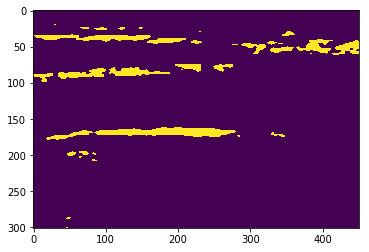

In [9]:
plt.imshow(binarized_image)
plt.show()

In [10]:
# Applying Closing to fill in the holes
filter = np.ones((3,3),np.uint8)
closed_image = cv2.morphologyEx(binarized_image, cv2.MORPH_CLOSE, filter)

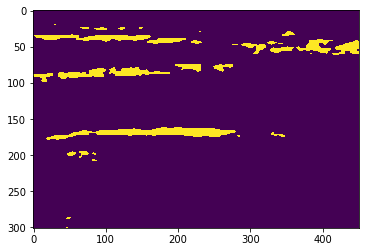

In [11]:
plt.imshow(closed_image)
plt.show()

In [12]:
# Using connected components to label the image
retval, markers = cv2.connectedComponents(closed_image)

# Mapping the component labels to hue val
label_hue = np.uint8(120*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_image = cv2.merge([label_hue, blank_ch, blank_ch])

# changing from HSV to RGB again to show
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_HSV2BGR)

# background label set to black
labeled_image[label_hue==0] = 0

# getting the unique colors in the image
unique_colors = np.unique(labeled_image.reshape(-1, labeled_image.shape[2]), axis=0)

print ("'Colors available in labeled image:'")
for x in range(unique_colors.shape[0]):
    print (str(x+1)+"=> B:"+str(unique_colors[x,0])+"    G:"+str(unique_colors[x,1])+"   R:"+str(unique_colors[x,2])+" ")

print ("\nSelect one of the colors and give its RGB values ")

r = input("B : ")
g = input("G : ")
b = input("R : ")


'Colors available in labeled image:'
1=> B:0    G:0   R:0 
2=> B:0    G:25   R:255 
3=> B:0    G:59   R:255 
4=> B:0    G:93   R:255 
5=> B:0    G:127   R:255 
6=> B:0    G:153   R:255 
7=> B:0    G:187   R:255 
8=> B:0    G:221   R:255 
9=> B:0    G:255   R:0 
10=> B:0    G:255   R:33 
11=> B:0    G:255   R:67 
12=> B:0    G:255   R:101 
13=> B:0    G:255   R:102 
14=> B:0    G:255   R:127 
15=> B:0    G:255   R:161 
16=> B:0    G:255   R:195 
17=> B:0    G:255   R:229 
18=> B:0    G:255   R:255 
19=> B:25    G:255   R:0 
20=> B:59    G:255   R:0 
21=> B:93    G:255   R:0 
22=> B:127    G:255   R:0 
23=> B:153    G:255   R:0 
24=> B:187    G:255   R:0 
25=> B:221    G:255   R:0 
26=> B:255    G:0   R:0 
27=> B:255    G:33   R:0 
28=> B:255    G:67   R:0 
29=> B:255    G:101   R:0 
30=> B:255    G:127   R:0 
31=> B:255    G:161   R:0 
32=> B:255    G:195   R:0 
33=> B:255    G:229   R:0 
34=> B:255    G:254   R:0 

Select one of the colors and give its RGB values 
B : 25
G : 33
R : 33


In [13]:
# making an output image
output_image = np.zeros_like(labeled_image)

# getting the object of user input color
for x in range(labeled_image.shape[0]):
    for y in range(labeled_image.shape[1]):
        if (labeled_image[x,y,0] == int(r) and labeled_image[x,y,1] == int(g) and labeled_image[x,y,2] == int(b)):
            output_image[x,y,0:3] = labeled_image[x,y,0:3]

# show the output image
# cv2.imshow("Selected", labeled_image)
# cv2.waitKey(0)


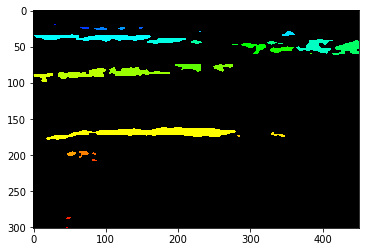

In [14]:
plt.imshow(labeled_image)
plt.show()